# Particle Swarm Optimization (PSO) for Inversion of Gravity Data

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [51]:
#generate population
population_density = np.linspace(0, 2, 10000)
population_t = np.linspace(500, 3000, 10000)
population_Z = np.linspace(1000, 3000, 10000)
population_alpha = np.linspace(0, 1.57, 5000)
population_h = np.linspace(00, 2500, 10000)

In [52]:
#generating a synthetic data with following parametric values
novariable = [1, 2, 3, 4, 5]
G = 6.67 * 10 ** -3   #
density = 1.0
t = 1500
h =800
z = 2500
alpha = np.pi *30/180

x = np.linspace(-8000,8000,50)
g = 2*G*density*t*((np.pi-np.arctan((x-h*(1/np.tan(alpha)))/(z-h)))-np.arctan((x + h*(1/np.tan(alpha)))/(z+h)))

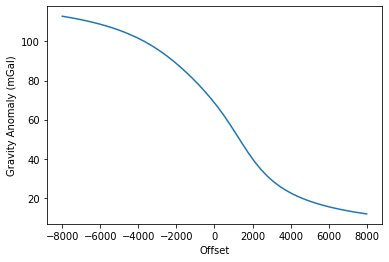

In [53]:
plt.plot(x, g)
plt.xlabel("Offset")
plt.ylabel("Gravity Anomaly (mGal)")
plt.show()

In [54]:
#Misfit function is defines below. It works better than simple MSE function
def misfit(density2, t2, z2, alpha2, h2):
    gi = 0
    ga = 2 * G * density2 * t2 * ((np.pi - np.arctan((x - h2 * (1 / np.tan(alpha2))) / (z2 - h2))) - np.arctan(
        (x + h2 * (1 / np.tan(alpha2))) / (z2 + h2)))
    for jk in range(len(x)):
        gi = (g[jk] - ga[jk]) ** 2 + gi
    fit = (gi / 2) ** 0.5
    return (fit)

In [55]:
P2_array = []
fit_array = []
n_parents = 25
def particle_generation(x):
    for itq in range(n_parents):  # Range should be equal to number of parents to generate
        density2 = random.choice(population_density)
        z2 = random.choice(population_Z)
        h2 = random.choice(population_h)
        alpha2 = random.choice(population_alpha)
        t2 = random.choice(population_t)

        P2 = [density2, t2, z2, alpha2, h2]

        P2_array.append(P2)
        ft = misfit(P2[0], P2[1], P2[2], P2[3], P2[4])
        fit_array.append(ft)
    P2_ar = np.array(P2_array)
    ft_ar = np.array(fit_array)
    return (P2_ar, ft_ar)

In [56]:
def velocity(w, c1, c2, pbest, gbest, P2_ar, V2_ar):
    V2_ar2 = []
    for ij in range(n_parents):
        veloi = []
        for kl in range(len(novariable)):
            
            r = np.random.uniform(0, 1, 1000)
            rand1 = random.choice(r)
            rand2 = random.choice(r)
        
            A = pbest[ij][kl] - P2_ar[ij][kl]
            B = gbest[kl] - P2_ar[ij][kl]
            velo = w * V2_ar[ij][kl] + (A * c1 * rand1) + (B * c2 * rand2)
            veloi.append(velo)
        V2_ar2.append(veloi)
    return (V2_ar2)

In [57]:
def weight(wmax, wmin, i):
    w = wmax - ((wmax - wmin) / iterations) * i
    return (w)

def position(P2_ar, V2_ar):
    P2_ar_temp3 = []
    
    for lmp in range(len(P2_ar)):   
        XXX = P2_ar[lmp] + V2_ar[lmp]
        P2_ar_temp3.append(XXX)
    return (P2_ar_temp3)

In [58]:
population_densityq = np.linspace(population_density[0]*0.1, population_density[-1]*0.1, len(population_density))
population_tq = np.linspace(population_t[0]*0.1, population_t[-1]*0.1, len(population_t))
population_Zq = np.linspace(population_Z[0]*0.1, population_Z[-1]*0.1, len(population_Z))
population_alphaq = np.linspace(population_alpha[0]*0.1, population_alpha[-1]*0.1, len(population_alpha))
population_hq = np.linspace(population_h[0]*0.1, population_h[-1]*0.1, len(population_h))

In [59]:
P2q_array = []
P2_array = []
fit_array = []
def velocity_generation():
    for ip in range(n_parents):  # Range should be equal to number of parents to generate
        density2q = random.choice(population_densityq)
        z2q = random.choice(population_Zq)
        h2q = random.choice(population_hq)
        alpha2q = random.choice(population_alphaq)
        t2q = random.choice(population_tq)
        P2q = [density2q, t2q, z2q, alpha2q, h2q]
        P2q_array.append(P2q)
    V2_ar = np.array(P2q_array)
    return (V2_ar)

V2_ar = velocity_generation()
c1 = 1.8
c2 = 1.8
wmax = 0.8
wmin = 0.1
P2_ar, ft_ar = particle_generation(x)

pbest = P2_ar
pbest_temp = P2_ar

gbest_fitness = np.min(ft_ar)
gbestposition = np.argmin(ft_ar)
gbest = pbest[gbestposition]
iterations = 2500
itr_count = []
g_value = []
print("Initial Min Misfit",gbest_fitness)
print("Initial Max Misfit", np.max(ft_ar))

Xmin = np.min(ft_ar)
Xposition = np.argmin(ft_ar)
Xmin_particle = P2_ar[Xposition]

Xmax = np.max(ft_ar)
Xposition2 = np.argmax(ft_ar)
Xmax_particle = P2_ar[Xposition2]

for i in range(iterations):
    
    w = weight(wmax, wmin, i)
    
    pbest_temp2 = []
    ftl_temp_2 = []        
    for ii in range(n_parents):
        if misfit(pbest_temp[ii][0],pbest_temp[ii][1],pbest_temp[ii][2],pbest_temp[ii][3],pbest_temp[ii][4]) <= misfit(P2_ar[ii][0],P2_ar[ii][1],P2_ar[ii][2],P2_ar[ii][3],P2_ar[ii][4]):
            ftl = misfit(pbest_temp[ii][0],pbest_temp[ii][1],pbest_temp[ii][2],pbest_temp[ii][3],pbest_temp[ii][4])
            pbest_temp2.append(pbest_temp[ii])
            ftl_temp_2.append(ftl)
            
        else:
            ftl = misfit(P2_ar[ii][0],P2_ar[ii][1],P2_ar[ii][2],P2_ar[ii][3],P2_ar[ii][4])
            pbest_temp2.append(P2_ar[ii])
            ftl_temp_2.append(ftl)              
    
    V2_ar = velocity(w, c1, c2, pbest, gbest, P2_ar, V2_ar)
    P2_ar =position(P2_ar, V2_ar)
    
    
    for tq in range(len(P2_ar)):
        ft_tempr = misfit(P2_ar[tq][0],P2_ar[tq][1],P2_ar[tq][2],P2_ar[tq][3],P2_ar[tq][4])
        ft_ar[tq] = ft_tempr
    
    
    P2_ar_temp3 = []
    for y in range(n_parents):     
        if (ft_ar[y] >= Xmin) and (ft_ar[y] <= Xmax):
            Xnew = P2_ar[y]
            P2_ar_temp3.append(Xnew)
        elif ft_ar[y] < Xmin:
            Xnew = P2_ar[0]
            P2_ar_temp3.append(Xnew)
        elif ft_ar[y] > Xmax:
            Xnew = P2_ar[-1]
            P2_ar_temp3.append(Xnew) 
        
    P2_ar = P2_ar_temp3
    
    Xmin = np.min(ft_ar)
    Xposition = np.argmin(ft_ar)
    Xmin_particle = P2_ar[Xposition]
    
    Xmax = np.max(ft_ar)
    Xposition2 = np.argmax(ft_ar)
    Xmax_particle = P2_ar[Xposition2]
    
    pbest = pbest_temp2
    pbest_temp = pbest
    
    gbest_fitness = np.min(ftl_temp_2)
    gbestposition = np.argmin(ftl_temp_2)
    gbest = pbest[gbestposition]

    itr_count.append(i)
    g_value.append(gbest_fitness)

Initial Min Misfit 51.26473752770093
Initial Max Misfit 571.6953209411674


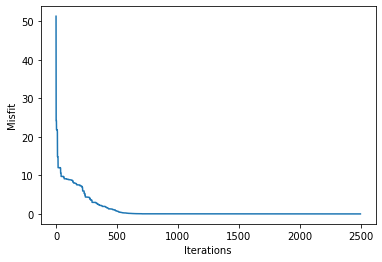

In [60]:
plt.plot(itr_count,g_value)
plt.xlabel("Iterations")
plt.ylabel("Misfit")
plt.show()

In [45]:
print("Final Misfit",gbest_fitness)
print("Final max Misfit", np.max(ft_ar))

Final Misfit 1.1428786871778621e-10
Final max Misfit 3.2981621923241643e-10


In [ ]:
density2 = gbest[0]
t2 = gbest[1]
z2 = gbest[2]
alpha2 = gbest[3]
h2 = gbest[4]

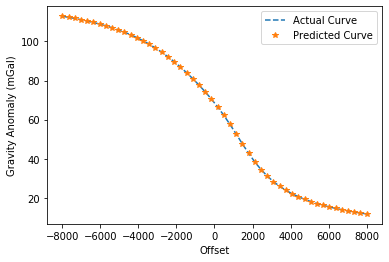

In [67]:
g2 = 2 * G * density2 * t2 * ((np.pi - np.arctan((x - h2 * (1 / np.tan(alpha2))) / (z2 - h2))) - np.arctan(
    (x + h2 * (1 / np.tan(alpha2))) / (z2 + h2)))

plt.plot(x, g, "--", markersize=1, label="Actual Value")
plt.plot(x, g2, "*", lw=0.8, label="Predicted Value")
plt.xlabel("Offset")
plt.ylabel("Gravity Anomaly (mGal)")
plt.legend(("Actual Curve","Predicted Curve"))

In [66]:
print("Density Contrast (density):", density2)
print("Thickness (t):", t2)
print("Height (h):", h2)
print('Depth (z):', z2)
print("Alpha:", (alpha2 * 180 / np.pi)%360)    

Density Contrast (density): 0.6833305805174937
Thickness (t): 2195.1307943280203
Height (h): 799.9999999996267
Depth (z): 2499.999999999718
Alpha: 29.999999999980943
